In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [2]:
# pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima
# from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


# from statsmodels.tsa.api import VAR
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tools.eval_measures import rmse, aic

In [3]:
df = pd.read_csv("Merge.csv")
df.head()

,Date,Irradiance,Power,Temperature,Humidity
0,2021-09-01,46249.0,8398.411409,85.3,78.3
1,2021-09-02,22069.0,4007.536193,82.9,79.1
2,2021-09-03,35961.0,6530.201143,84.5,76.8
3,2021-09-04,38056.0,6910.634707,83.0,77.3
4,2021-09-05,50757.0,9217.024538,82.8,78.3


In [4]:
df.shape

(365, 5)

In [5]:
df.isna().sum()

Date           0
Irradiance     1
Power          1
Temperature    0
Humidity       0
dtype: int64

In [13]:
df['Irradiance'] = df['Irradiance'].fillna(df['Irradiance'].mean())
df['Power'] = df['Power'].fillna(df['Power'].mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Irradiance   365 non-null    float64
 2   Power        365 non-null    float64
 3   Temperature  365 non-null    float64
 4   Humidity     365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


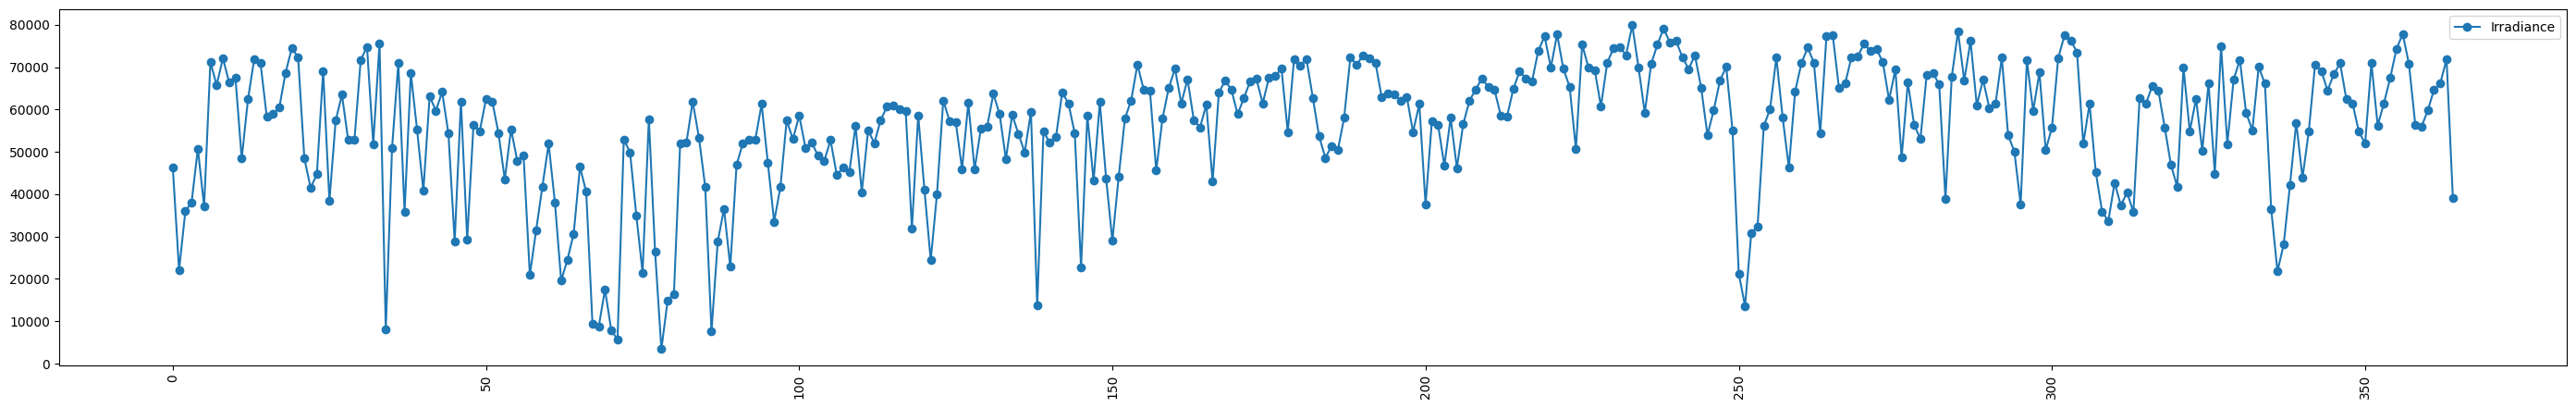

In [15]:
# Ploting the curve 
plt.figure(figsize=(35,5))
#plt.grid()
plt.plot(df['Irradiance'], marker='o', label='Irradiance')
plt.xticks(rotation=90)
plt.legend()
plt.show()

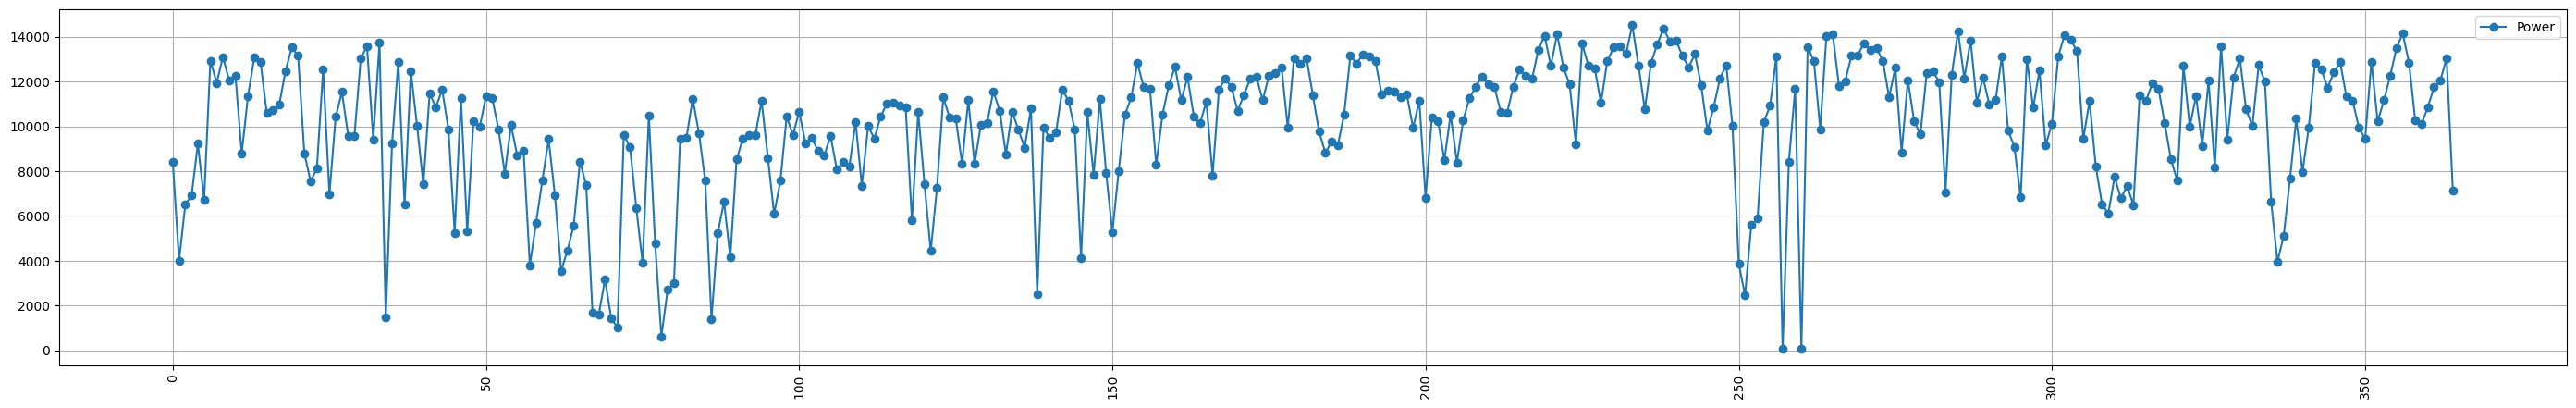

In [16]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df['Power'], marker='o', label='Power')
plt.xticks(rotation=90)
plt.legend()
plt.show()

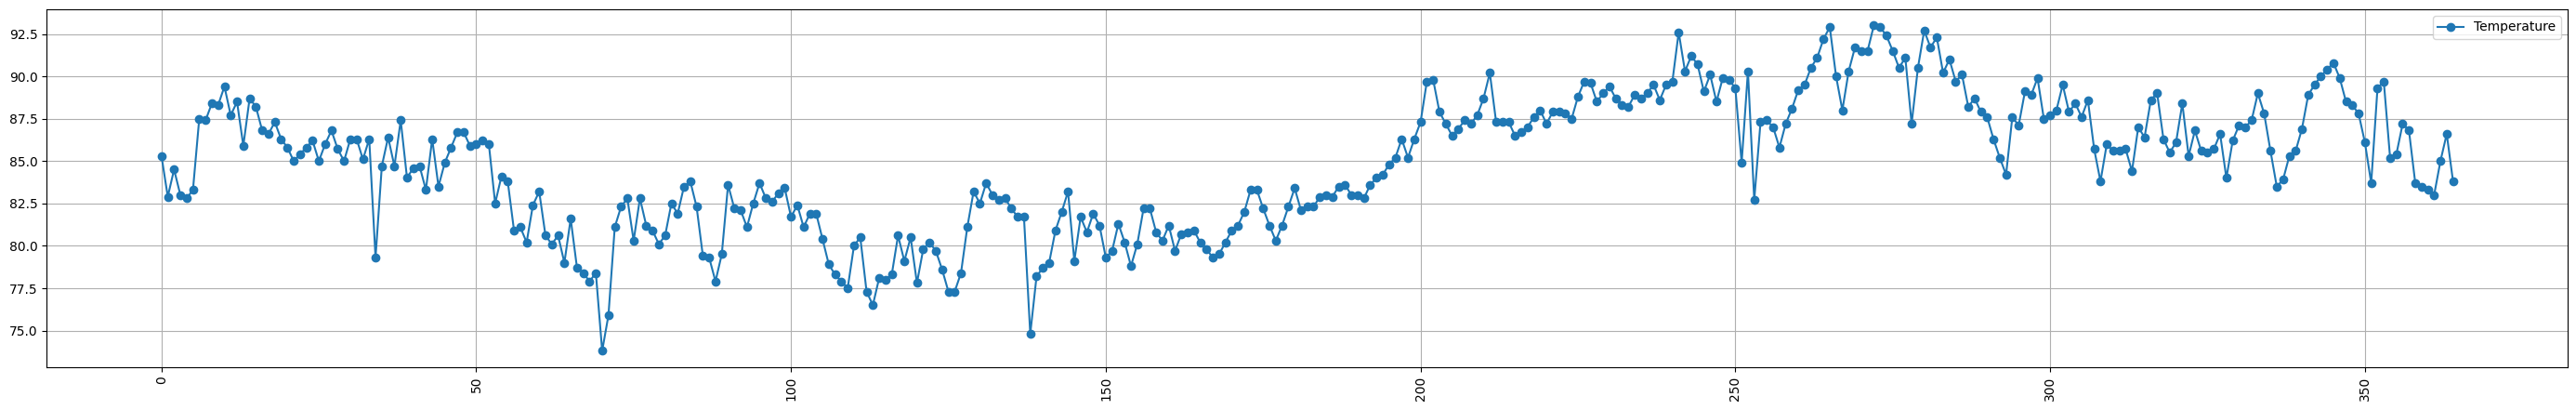

In [17]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df['Temperature'], marker='o', label='Temperature')
plt.xticks(rotation=90)
plt.legend()
plt.show()

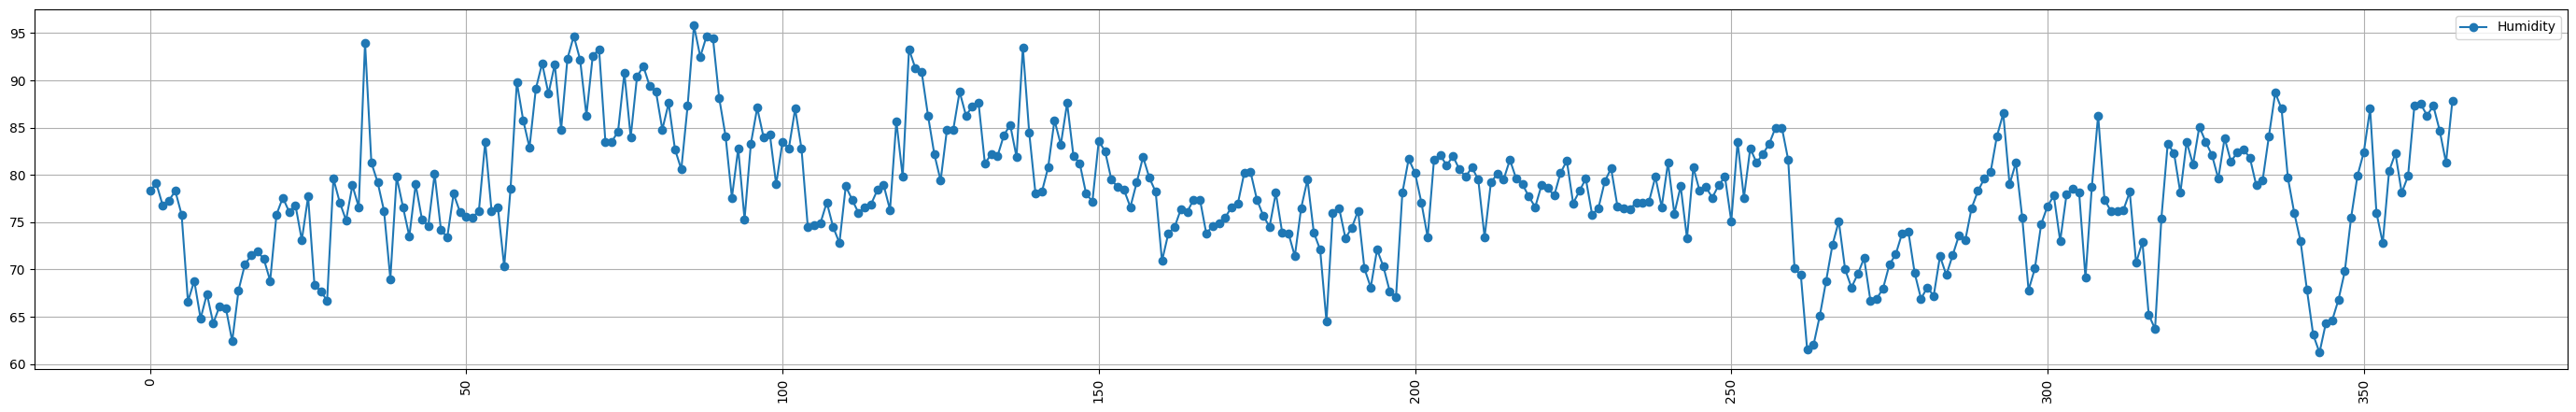

In [18]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(df['Humidity'], marker='o', label='Humidity')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Conclusion**
* We can see the seasonality and it seems like it is repeating over a period

**Seasonal Decomposition**

In [19]:
ts_decomposition = seasonal_decompose(x=df['Power'], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid


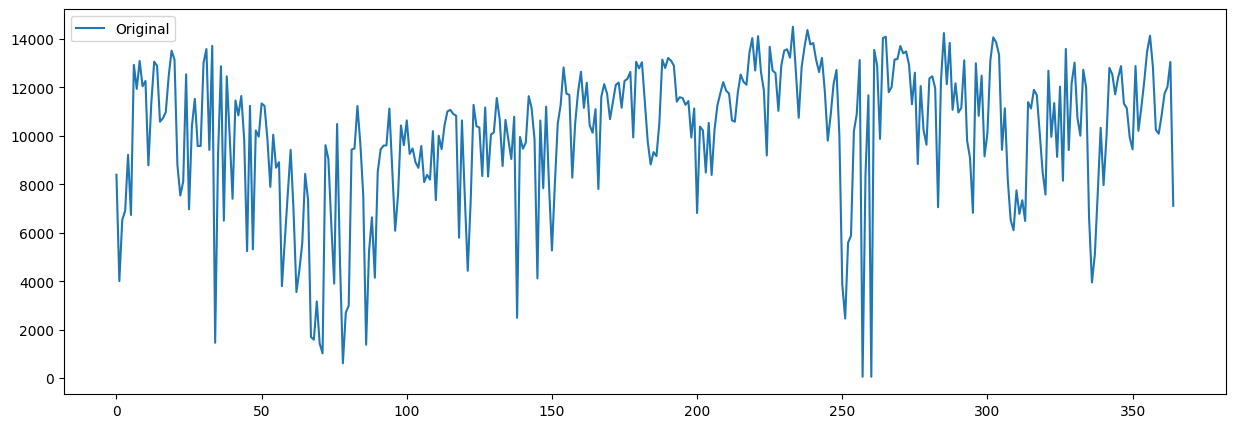

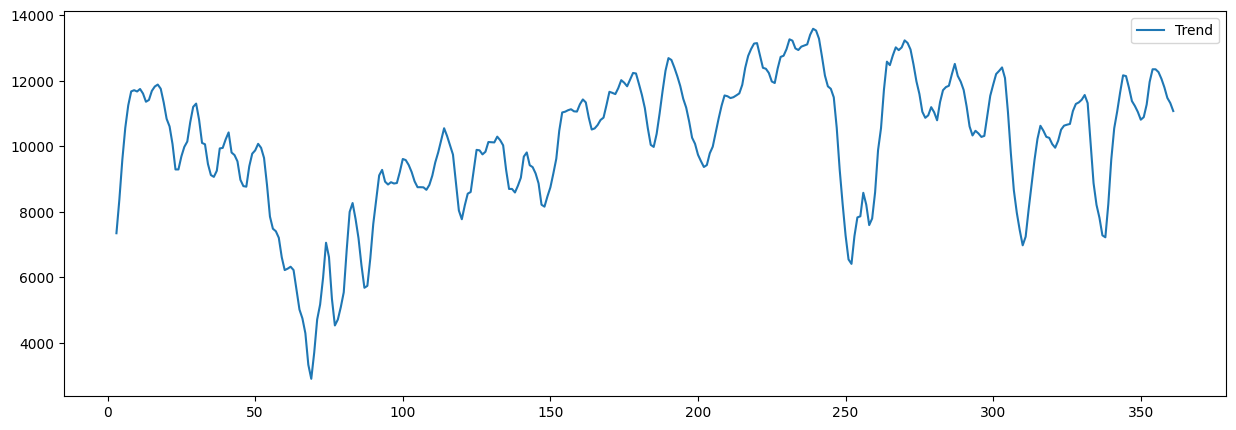

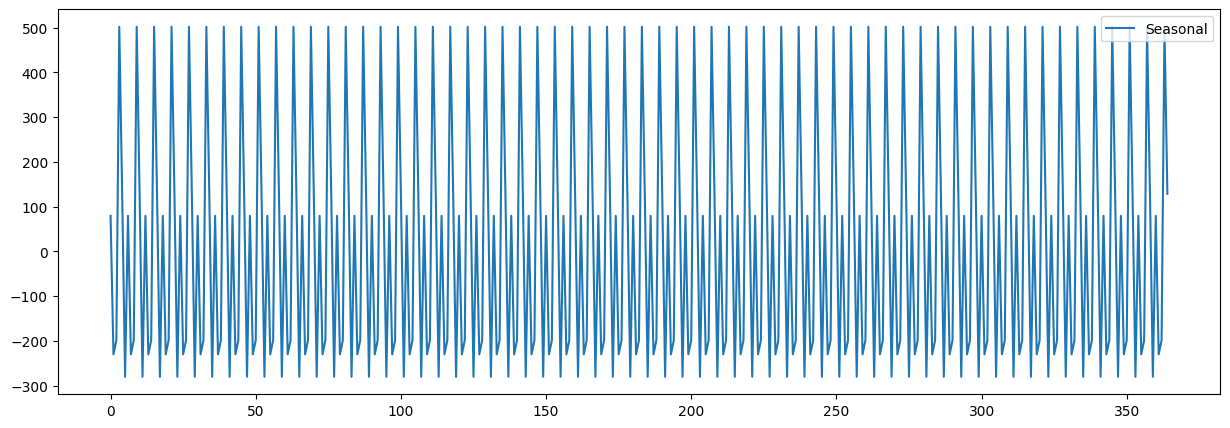

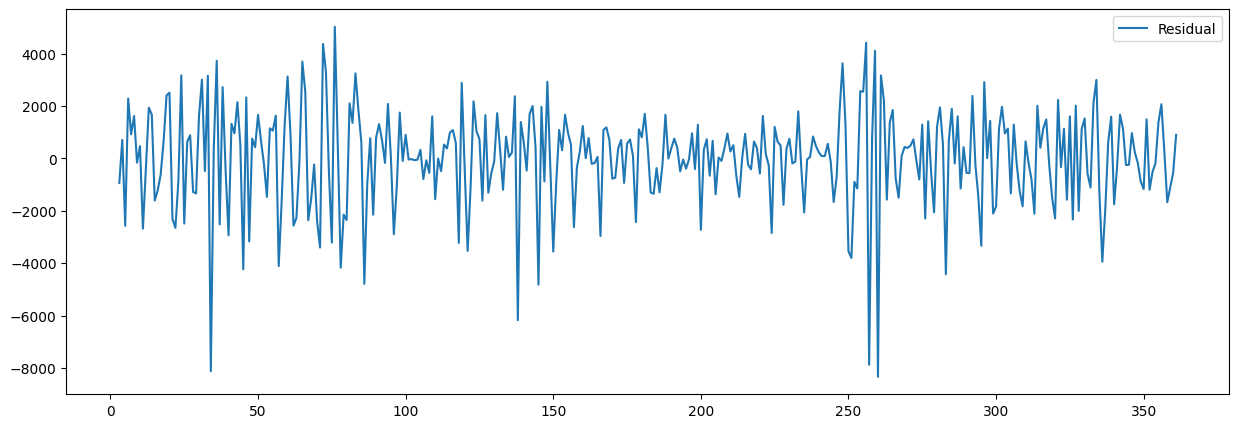

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df['Power'], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

**Rolling Mean and Standard Deviation**

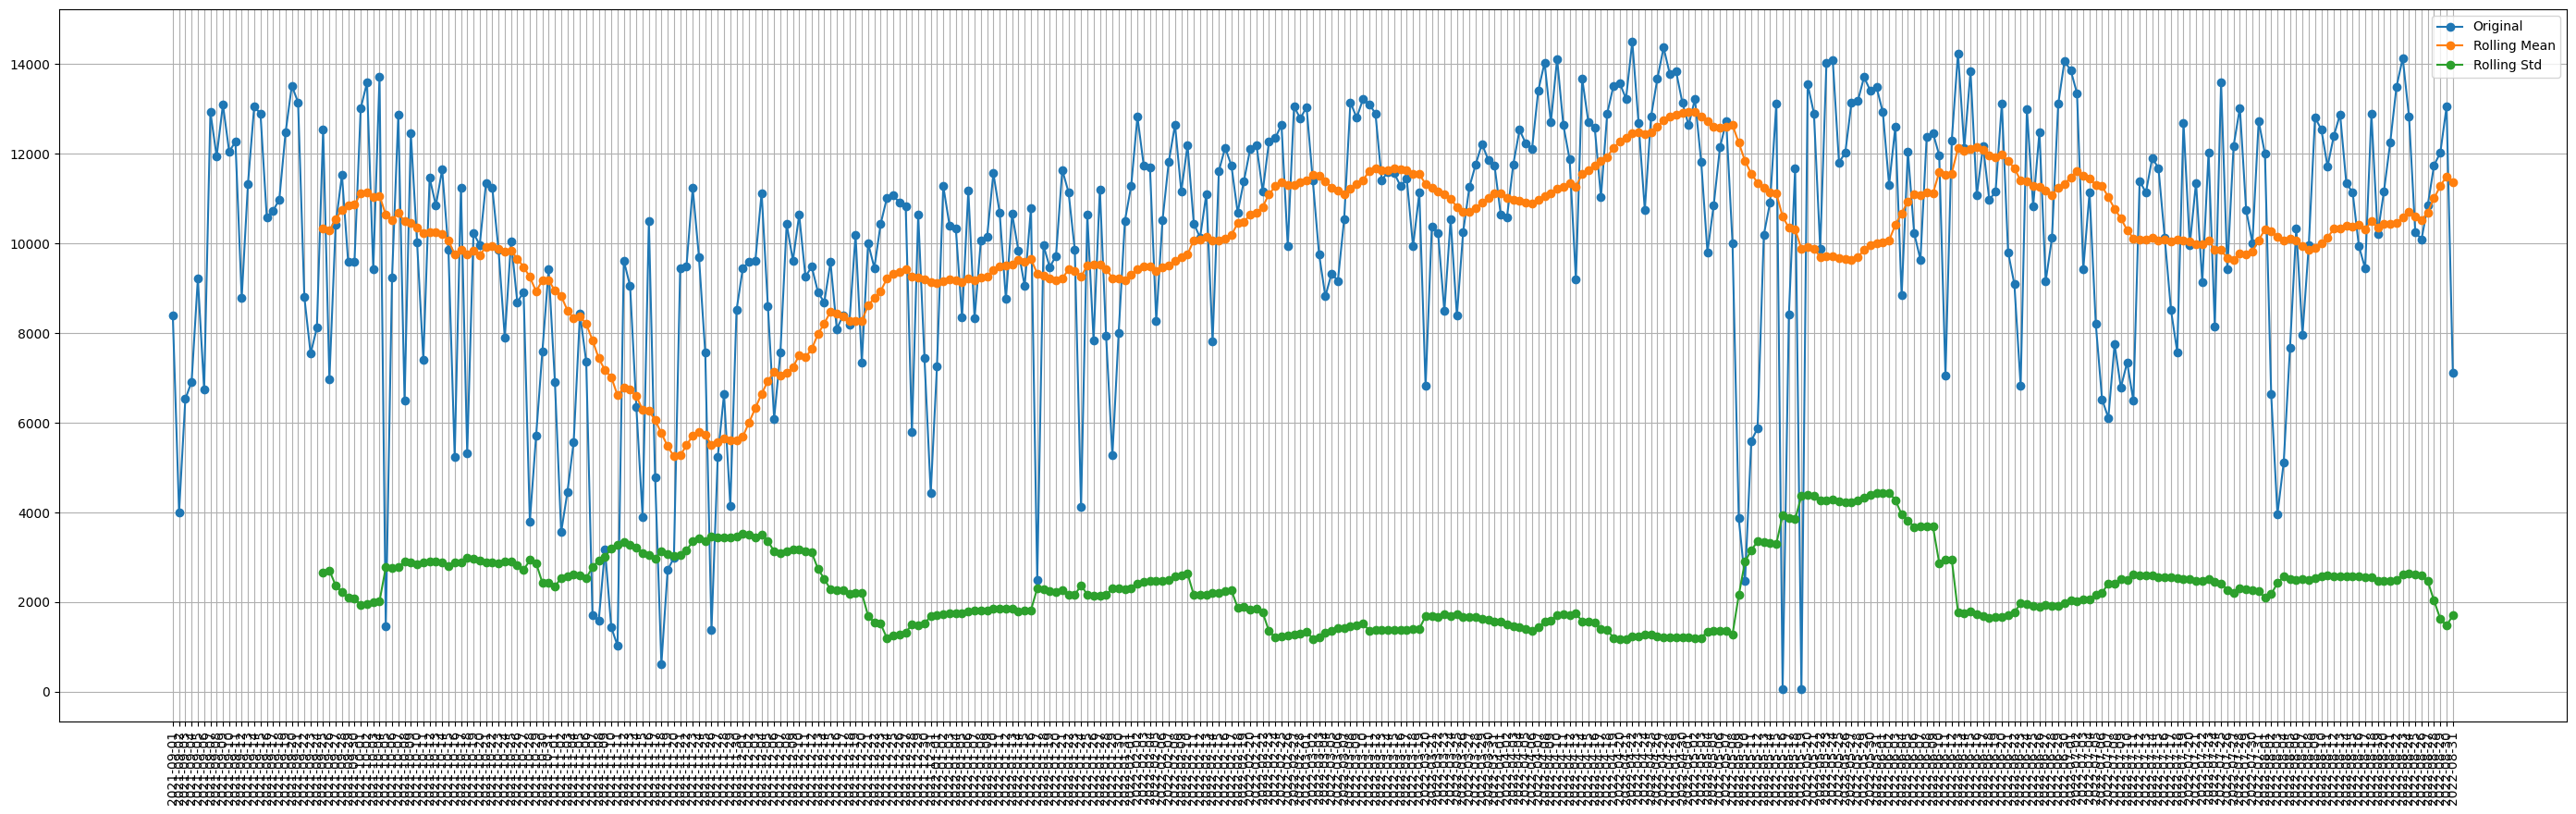

In [21]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Power'], marker='o', label='Original')
plt.plot(df['Date'], df['Power'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Power'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Conclusion**
* We can see that Mean is not constant. 
* Standard deviation is also not constant. 
* It is non-stationary data. 
* We'll plot for other features as well

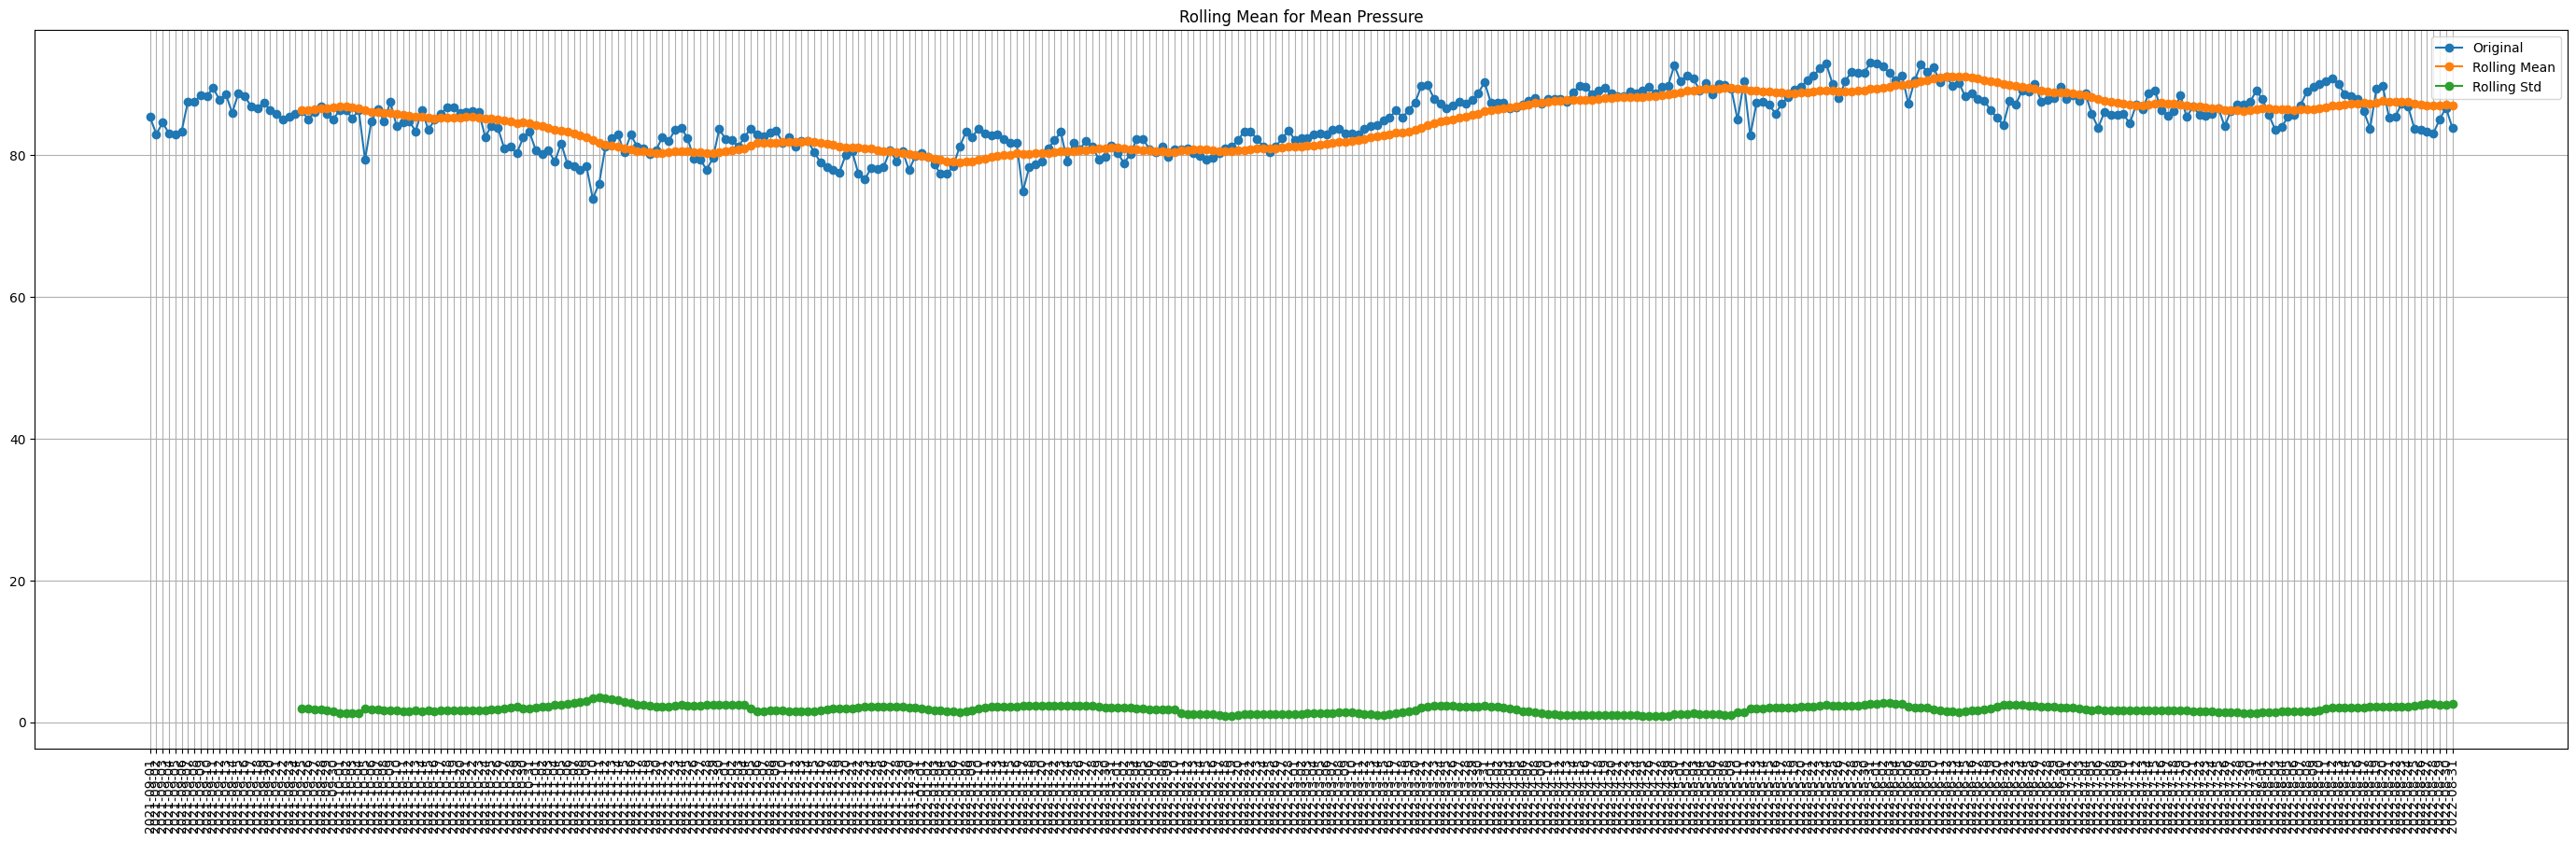

In [22]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Temperature'], marker='o', label='Original')
plt.plot(df['Date'], df['Temperature'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Temperature'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Pressure")
plt.legend()
plt.show()

**Conclusion**
* It is constant.
* To check for stationarity we have to perform the adf test

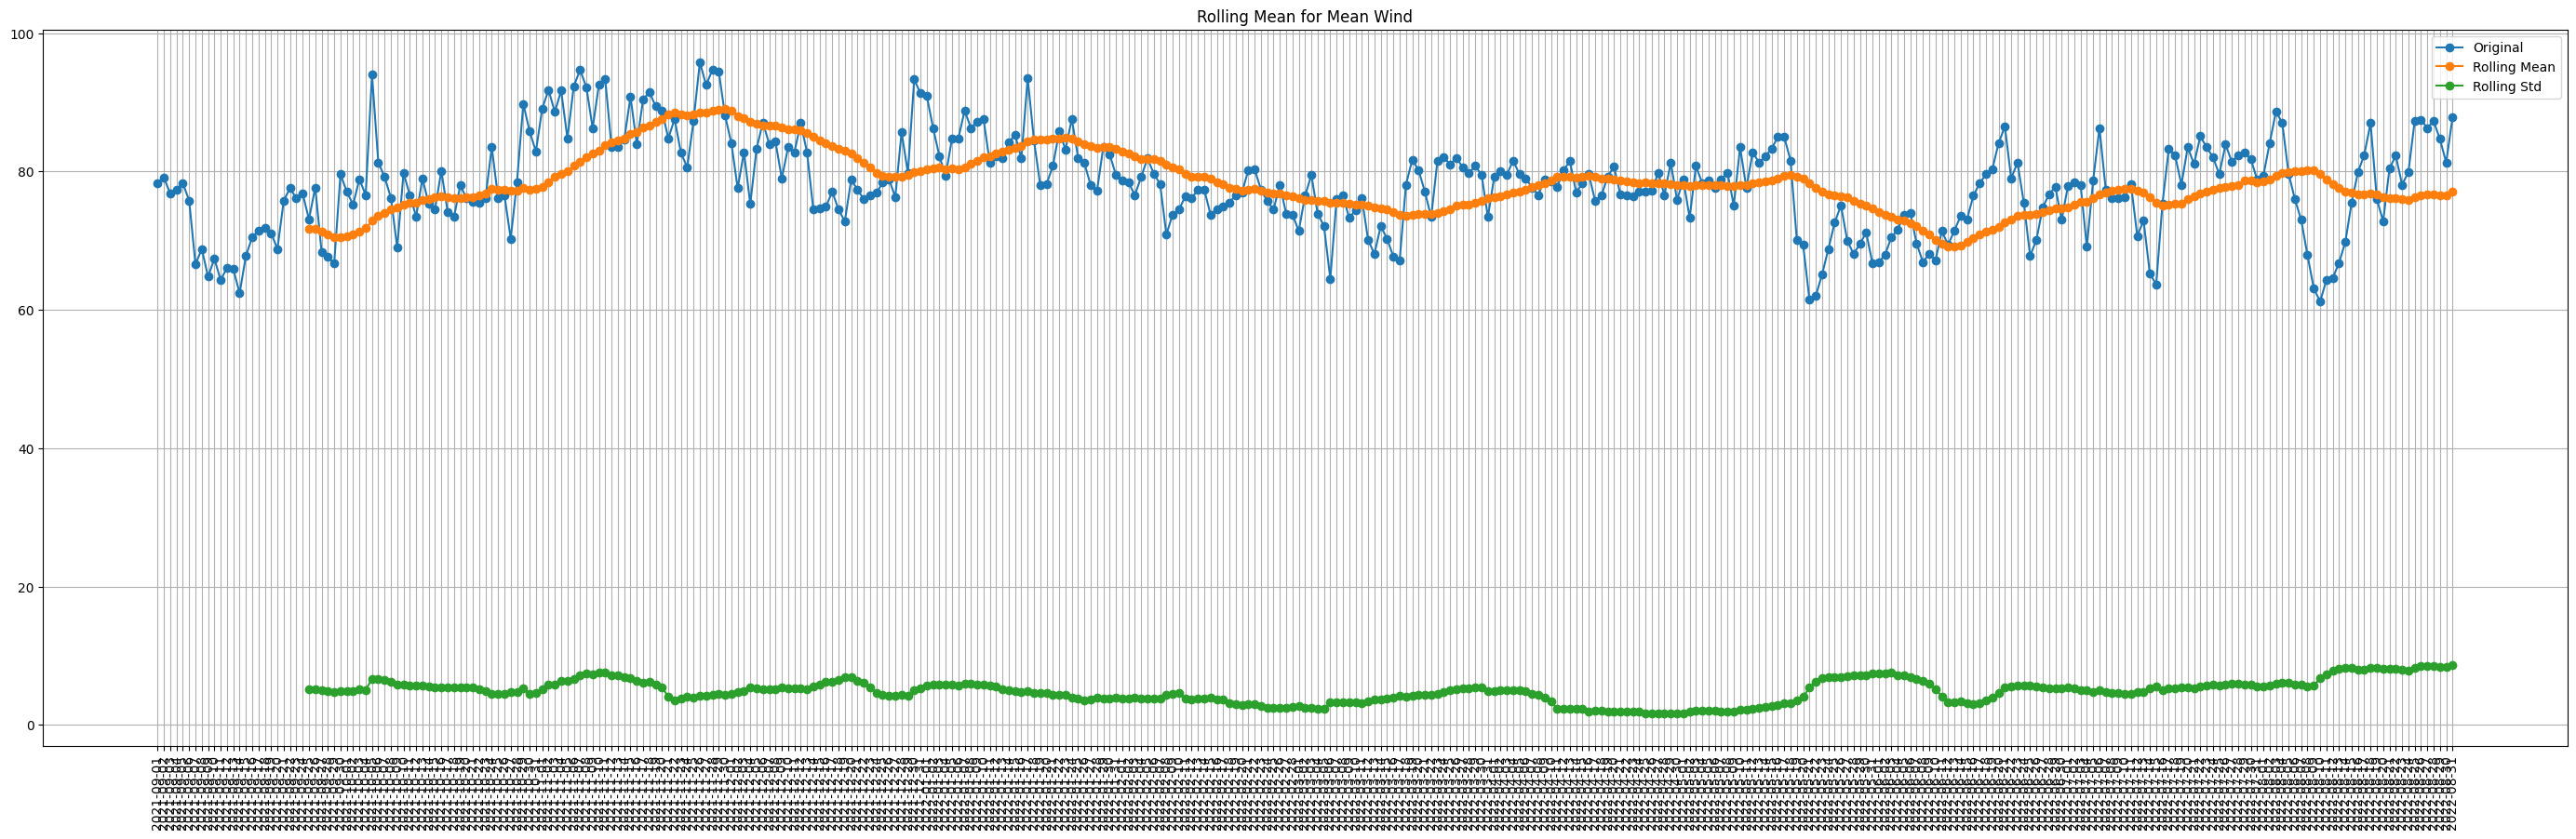

In [23]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Humidity'], marker='o', label='Original')
plt.plot(df['Date'], df['Humidity'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Humidity'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Wind")
plt.legend()
plt.show()

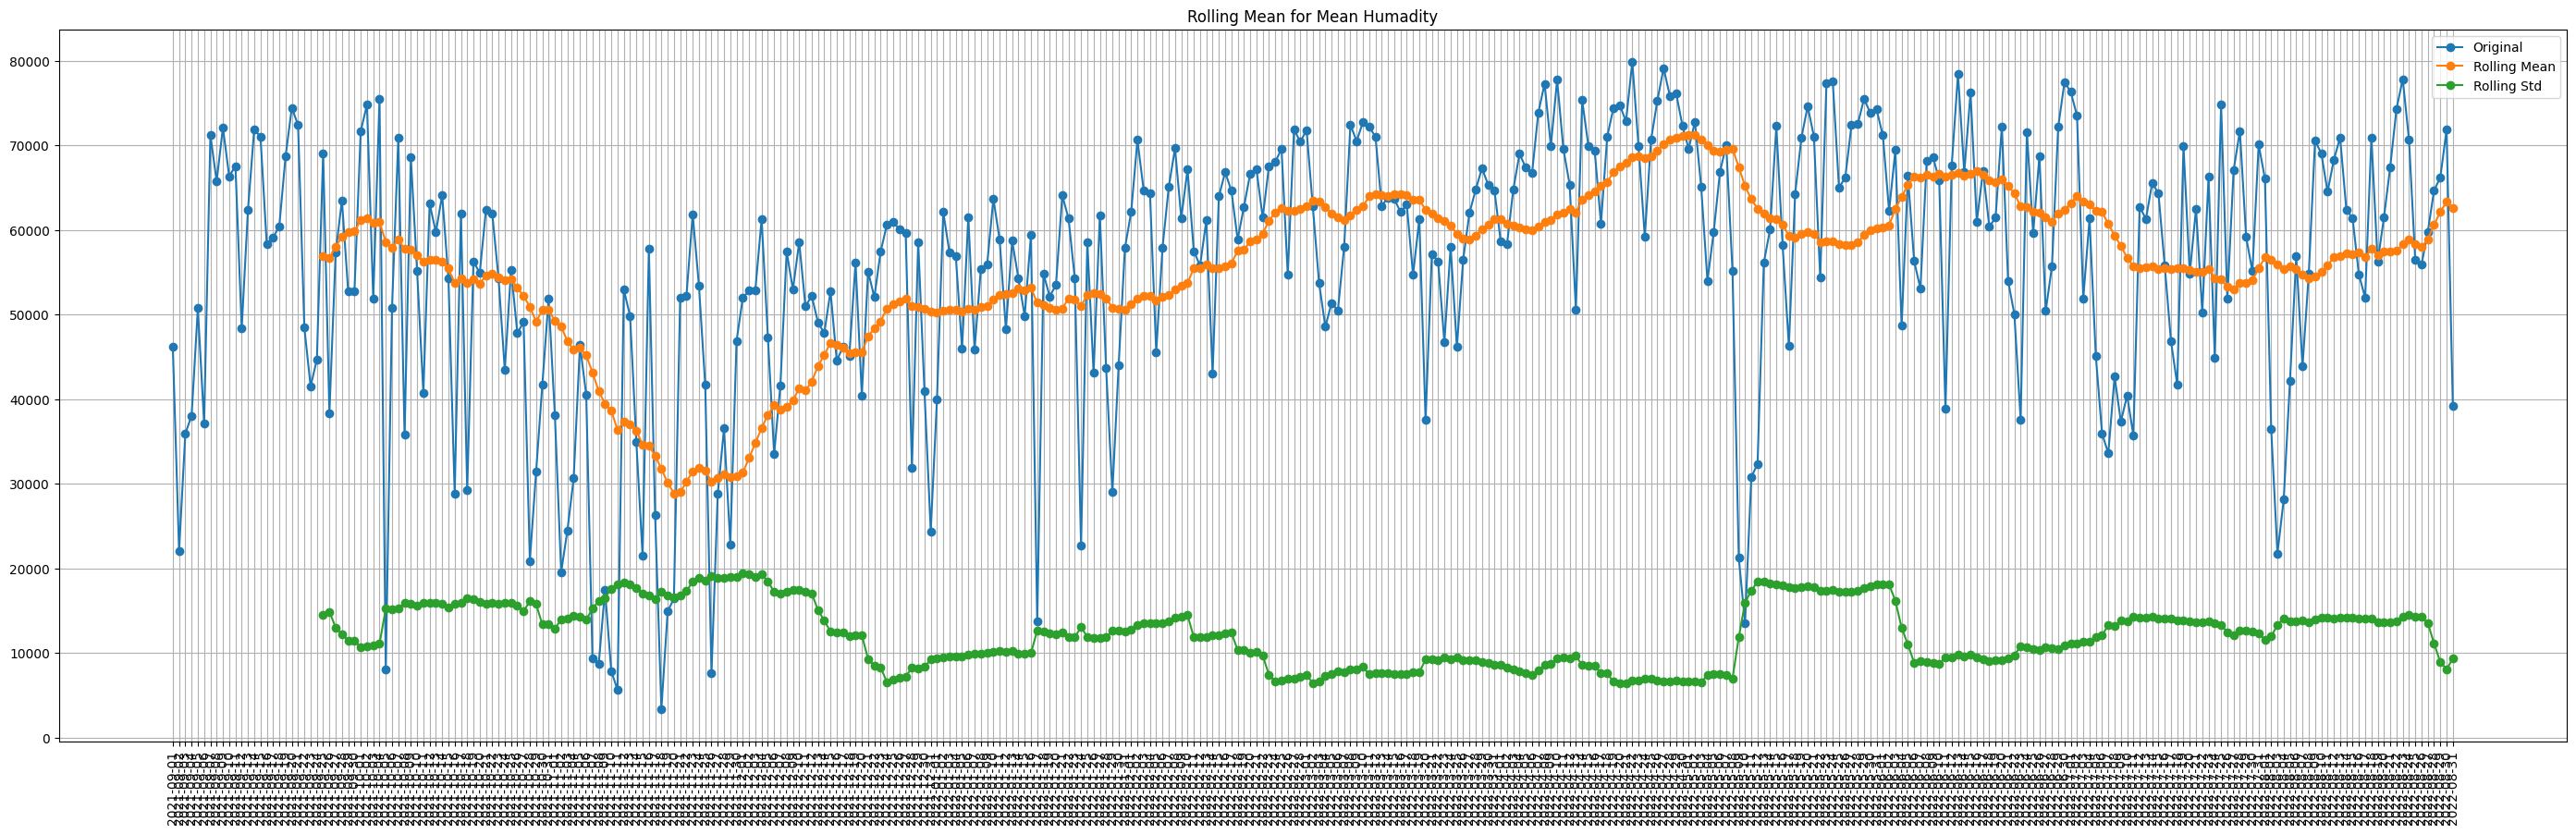

In [24]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['Date'], df['Irradiance'], marker='o', label='Original')
plt.plot(df['Date'], df['Irradiance'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['Date'], df['Irradiance'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Humadity")
plt.legend()
plt.show()